In [77]:
import pandas as pd 
data = pd.read_excel("data/Mall Customers.xlsx")
df = data.copy()
df.head()


,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


In [78]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Education               200 non-null    object
 4   Marital Status          200 non-null    object
 5   Annual Income (k$)      200 non-null    int64 
 6   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


Dans ce dataset, nous avons au total 200 observations, 7 colonnes à raisons de 3 colonnes catégorielles et 4 colonnes numériques. 
aucune colonnes ne contient de valeurs manquantes.

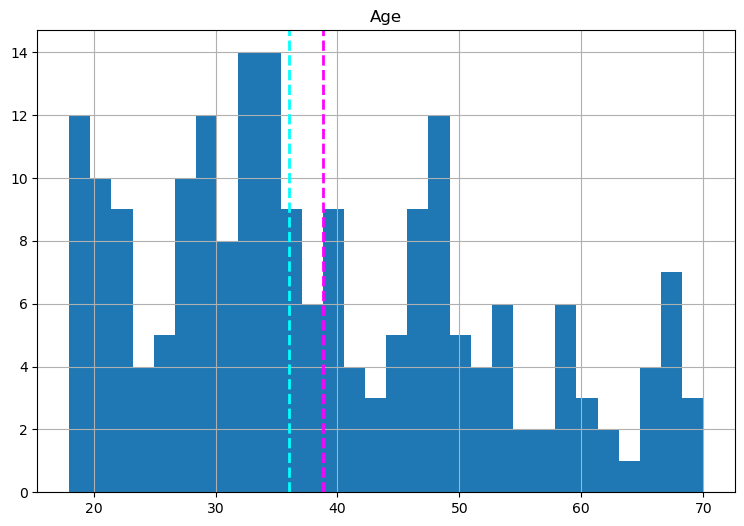

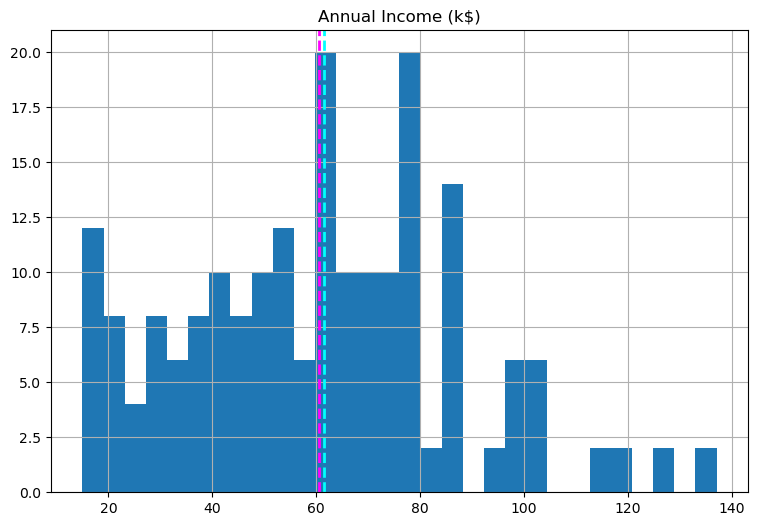

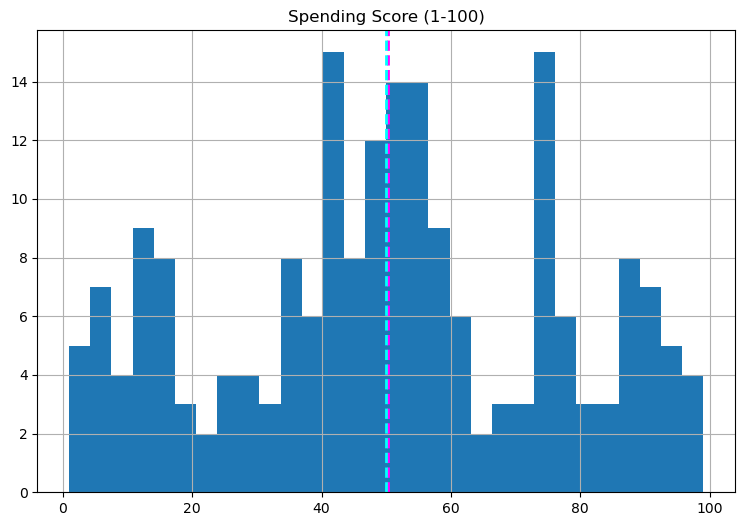

In [80]:
import matplotlib.pyplot as plt
numeric_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=30, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)

In [81]:
skew_value = df[numeric_features].skew()
print(f"coefficient d'assymétrie:\n {skew_value}" )

coefficient d'assymétrie:
 Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64


les coefficients d'assymétries ainsi calculer nous indiquent que l'écart entre la moyenne et la médiane de chacune des colonnes est négligeabe, par conséquent, les variables suivent une distribution à peu près symétrique. Ainsi, une normalisation StandardScaler est la plus appropriée. 

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
df = df.drop(columns='CustomerID', errors='ignore')
df.columns = df.columns.str.strip()
categorial_features = ['Gender', 'Education', 'Marital Status']

numrical_transform = Pipeline([
    ('scaler', StandardScaler())
])

categorial_transform = Pipeline([
    ('encoding', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ('numerical', numrical_transform, numeric_features),
    ('categorial', categorial_transform, categorial_features)
])

#scaled_features = StandardScaler().fit_transform(numeric_features)




In [83]:
from sklearn.decomposition import PCA

full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2))
])


x_2d = full_pipeline.fit_transform(df)

print(f"Ancienne forme : {df.shape}")
print(f"Nouvelle forme : {x_2d.shape}")


Ancienne forme : (200, 6)
Nouvelle forme : (200, 2)


Text(0, 0.5, 'Composante Principale 2')

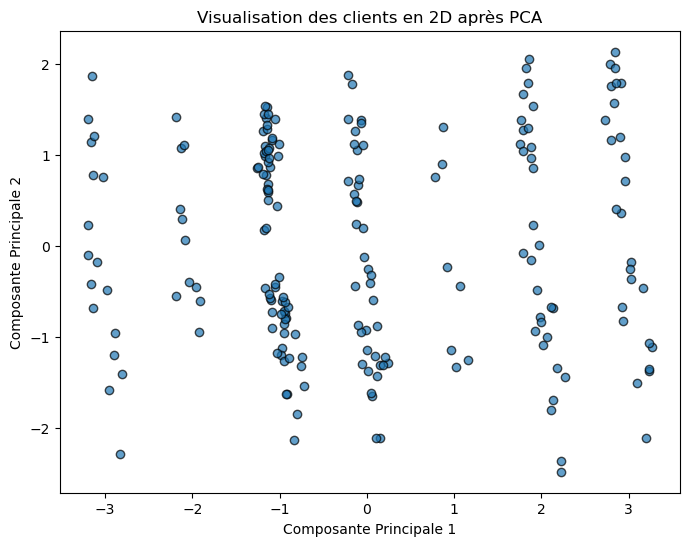

In [84]:
plt.figure(figsize=(8,6))
plt.scatter(x_2d[:, 0], x_2d[:, 1], alpha=0.7, edgecolors='k')
plt.title("Visualisation des clients en 2D après PCA")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")

e:\ANC\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\ANC\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\ANC\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\ANC\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

Text(0, 0.5, 'WCSS')

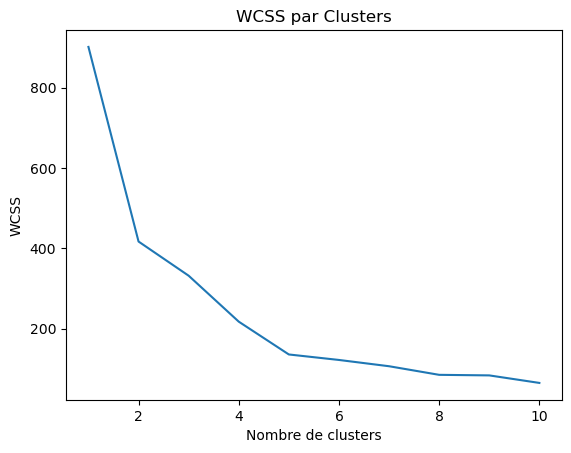

In [87]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wscc = []
for i in range (1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(x_2d)
    wscc.append(k_means.inertia_)
plt.plot(range(1,11), wscc)
plt.title('WCSS par Clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')



In [88]:
model = KMeans(n_clusters=5, init='k-means++', n_init=100, max_iter=1000)
km_cluster = model.fit_predict(x_2d)
print(km_cluster)


e:\ANC\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3 3 0 3 4 3 2 3 2 3 2 4 1 3 0 4 2 4 0 3 1 3 0 4 2 3 0 4 2 3 2 4 0 1 0 1 0
 3 0 3 0 4 1 3 0 4 1 1 3 1 2 3 3 2 0 0 0 2 3 0 2 3 0 2 0 4 1 2 3 1 0 0 0 2
 1 3 0 2 3 0 0 4 2 0 3 0 0 4 3 2 0 3 0 0 4 3 0 1 1 4 1 2 0 3 0 4 2 2 2 2 0
 4 0 4 3 3 0 0 1 0 3 1 3 3 1 3 0 3 0 4 0 4 3 3 1 3 0 1 1 4 0 4 3 3 1 4 0 3
 0 3 0 3 0 4 1 4 0 3 2 3 0 1 2 4 2 4 2 4 0 3 2 3 2 3 0 3 2 3 2 4 2 3 2 3 0
 4 2 1 0 4 0 3 0 3 2 3 0 4 0 1]


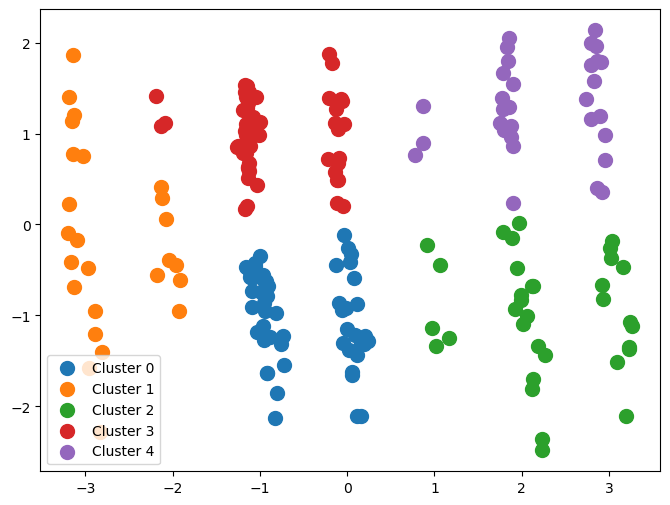

In [100]:
'''def plot_clusters(samples, clusters):
    col_dic = {0:'blue', 1:'green', 2: 'red', 3: 'orange', 4: 'black', 5: 'yellow'}
    mrk_dic = {0:'*', 1:'x', 2:'+', 3:'s', 4:'d', 5:'o'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for i in range (len(clusters)):
        plt.scatter(samples[i, 0], samples[i, 1], color = colors[i], marker=markers[i], s=100)
        plt.xlabel('Dimension 1')
        plt.ylabel('Dimension 2')
        plt.title('Assignments')
plot_clusters(x_2d, km_cluster)'''

def plot_clusters_fast(samples, clusters):
    plt.figure(figsize=(8, 6))
    for cluster_id in range(5): 
        # On sélectionne uniquement les points appartenant au cluster actuel
        points = samples[clusters == cluster_id]
        plt.scatter(points[:, 0], points[:, 1], s=100, label=f'Cluster {cluster_id}')
    
    plt.legend()

plot_clusters_fast(x_2d, km_cluster)

In [104]:
score = silhouette_score(x_2d, km_cluster)
print(f"silhouette score: {score:.3f}")

silhouette score: 0.507
